# FINAL PROJECT

## Introduction

The source of the data comes from https://www.kaggle.com/datasets/berkayalan/the-most-expensive-football-transfers. The information stored in the data includes some details of top 54 transfers. There are names of players, when and where they were born, which country/club they were from, which country/club they were transferred to, their position, transfer year and transfer fee in euro and pound respectively in the file. 
In this notebook, I will do exploratory data analysis on this dataset and try to figure out what the future transfer market of top players will be like.

I added some players to this dataset so that it could be more complete. Then I try to make all the data ordered in a sequence. After that, I created a new dataset to store the top one transfer of each year collected in the complete dataset. I applied the linear regression model from sklearn library to predict potential transfer fee of the top ones in the next few years. Besides, by checking the graphs, I selected several features, trying to build a better model. First I use the whole dataset to train this model, since the dataset is not very big. Then I tried to split the dataset into training set and test set in order to compare the two models.

## Coding Section
Let's first load the data into this notebook and have a look at some basic information of this dataset!

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data=pd.read_csv('football_players.csv')
print(data)

    Rank                  Origin                     Player From(Country)  \
0      1                  Brazil                     Neymar         Spain   
1      2                  France              Kylian Mbappé        France   
2      3                  Brazil          Philippe Coutinho       England   
3      4                Portugal                 João Félix      Portugal   
4      5                  France          Antoine Griezmann         Spain   
5      6                 England              Jack Grealish       England   
6      7                  France                 Paul Pogba         Italy   
7      7                  France            Ousmane Dembélé       Germany   
8      9                   Wakes                Gareth Bale       England   
9     10                Portugal          Cristiano Ronaldo         Spain   
10    11                 Belgium                Eden Hazard       England   
11    12                Portugal          Cristiano Ronaldo       England   

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           54 non-null     int64  
 1   Origin         54 non-null     object 
 2   Player         54 non-null     object 
 3   From(Country)  54 non-null     object 
 4   From(Club)     54 non-null     object 
 5   To(Country)    54 non-null     object 
 6   To(Club)       54 non-null     object 
 7   Position       54 non-null     object 
 8   Fee(€ mln)     54 non-null     float64
 9   Fee(£ mln)     54 non-null     object 
 10  Year           54 non-null     int64  
 11  Born           54 non-null     int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 5.2+ KB


Well, we can see that there are many columns in this dataset which already contain detailed information of the players. But there are only 54 entries, in other words, the sample size is pretty small. In addition, according to the website where it comes from, the last update of this dataset is one year ago. Therefore, I decided to add the information of some top transfers which took place on winter and summer of 2022. The source of the added information comes from https://www.dongqiudi.com/ and https://www.transfermarkt.com/.

In [4]:
df=data
Vlahovic=pd.Series({'Rank':61, 'Origin':'Serbia','Player':'Dušan Vlahović','From(Country)':'Italy','From(Club)':'Florence',
                  'To(Country)':'Italy','To(Club)':'Juventus','Position':'Striker',
                  'Fee(€ mln)':81.6,'Fee(£ mln)':'£73.4','Year':2022,'Born':2000},name='54') 
Antony=pd.Series({'Rank':62, 'Origin':'Brazil','Player':'Antony','From(Country)':'Netherlands','From(Club)':'Ajax',
                  'To(Country)':'England','To(Club)':'Manchester United','Position':'Forward',
                  'Fee(€ mln)':95.0,'Fee(£ mln)':'£85.5','Year':2022,'Born':2000},name='55')
Fofana=pd.Series({'Rank':63, 'Origin':'France','Player':'Wesley Fofana','From(Country)':'England','From(Club)':'Leicester City',
                  'To(Country)':'England','To(Club)':'Chelsea','Position':'Defender',
                  'Fee(€ mln)':80.4,'Fee(£ mln)':'£72.4','Year':2022,'Born':2000},name='56')
Tchouameni=pd.Series({'Rank':64, 'Origin':'France','Player':'Aurélien Tchouaméni','From(Country)':'France','From(Club)':'Monaco',
                  'To(Country)':'Spain','To(Club)':'Real Madrid','Position':'Midfielder',
                  'Fee(€ mln)':80.0,'Fee(£ mln)':'£72.0','Year':2022,'Born':2000},name='57')
Nunez=pd.Series({'Rank':65, 'Origin':'Uruguay','Player':'Darwin Núñez','From(Country)':'Portugal','From(Club)':'SL Benfica',
                  'To(Country)':'England','To(Club)':'Liverpool','Position':'Forward',
                  'Fee(€ mln)':75.0,'Fee(£ mln)':'£67.5','Year':2022,'Born':1999},name='58')
Casemiro=pd.Series({'Rank':66, 'Origin':'Brazil','Player':'Casemiro','From(Country)':'Spain','From(Club)':'Real Madrid',
                  'To(Country)':'England','To(Club)':'Manchester United','Position':'Midfielder',
                  'Fee(€ mln)':70.65,'Fee(£ mln)':'£63.6','Year':2022,'Born':1992},name='59')
Isak=pd.Series({'Rank':67, 'Origin':'Sweden','Player':'Alexander Isak','From(Country)':'Spain','From(Club)':'Real Sociedad',
                  'To(Country)':'England','To(Club)':'Newcastle','Position':'Striker',
                  'Fee(€ mln)':70.0,'Fee(£ mln)':'£63.0','Year':2022,'Born':1999},name='60')
deLigt=pd.Series({'Rank':68, 'Origin':'Netherlands','Player':'Matthijs de Ligt','From(Country)':'Italy','From(Club)':'Juventus',
                  'To(Country)':'Germany','To(Club)':'Bayern Munich','Position':'Defender',
                  'Fee(€ mln)':67.0,'Fee(£ mln)':'£60.3','Year':2022,'Born':1999},name='61')
Cucurella=pd.Series({'Rank':69, 'Origin':'Spain','Player':'Marc Cucurella','From(Country)':'England','From(Club)':'Brighton',
                  'To(Country)':'England','To(Club)':'Chelsea','Position':'Defender',
                  'Fee(€ mln)':65.3,'Fee(£ mln)':'£58.8','Year':2022,'Born':1998},name='62')
Haaland=pd.Series({'Rank':70, 'Origin':'Norway','Player':'Erling Haaland','From(Country)':'Germany','From(Club)':'Borussia Dortmund',
                  'To(Country)':'England','To(Club)':'Manchester City','Position':'Striker',
                  'Fee(€ mln)':60.0,'Fee(£ mln)':'£54.0','Year':2022,'Born':2000},name='63')

              
df=df.append(Vlahovic).append(Haaland).append(Cucurella).append(deLigt)
df=df.append(Isak).append(Casemiro).append(Nunez)
df=df.append(Tchouameni).append(Fofana).append(Antony)
df

C:\Users\cjLee\AppData\Local\Temp\ipykernel_13744\272805505.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(Vlahovic).append(Haaland).append(Cucurella).append(deLigt)
C:\Users\cjLee\AppData\Local\Temp\ipykernel_13744\272805505.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(Vlahovic).append(Haaland).append(Cucurella).append(deLigt)
C:\Users\cjLee\AppData\Local\Temp\ipykernel_13744\272805505.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(Vlahovic).append(Haaland).append(Cucurella).append(deLigt)
C:\Users\cjLee\AppData\Local\Temp\ipykernel_13744\272805505.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born
0,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.00,£198,2017,1992
1,2,France,Kylian Mbappé,France,Monaco,France,Paris Saint-Germain,Forward,180.00,£163,2018,1998
2,3,Brazil,Philippe Coutinho,England,Liverpool,Spain,Barcelona,Midfielder,145.00,£105,2018,1992
3,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.00,£104.1,2019,1999
4,5,France,Antoine Griezmann,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.00,£107,2019,1991
...,...,...,...,...,...,...,...,...,...,...,...,...
59,66,Brazil,Casemiro,Spain,Real Madrid,England,Manchester United,Midfielder,70.65,£63.6,2022,1992
58,65,Uruguay,Darwin Núñez,Portugal,SL Benfica,England,Liverpool,Forward,75.00,£67.5,2022,1999
57,64,France,Aurélien Tchouaméni,France,Monaco,Spain,Real Madrid,Midfielder,80.00,£72.0,2022,2000
56,63,France,Wesley Fofana,England,Leicester City,England,Chelsea,Defender,80.40,£72.4,2022,2000


There are 10 more top transfers added into this dataset, one of which took place in January and the others took place during summer time. 
To be honest, when supplementing the data, I was really shocked at how insanely Manchester United spent money during the last 2 months. So again my previous opinion was held firmly that top transfer fees will be skyrocketting.

Since the dataset now is out of order, I tried to rearrange it in the descending order of transfer fee. Thus the columns of index and rank need rearrangement. 

In [5]:
df.sort_values('Fee(€ mln)',axis=0,inplace=True,ascending=False)
df

,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born
0,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,£198,2017,1992
1,2,France,Kylian Mbappé,France,Monaco,France,Paris Saint-Germain,Forward,180.0,£163,2018,1998
2,3,Brazil,Philippe Coutinho,England,Liverpool,Spain,Barcelona,Midfielder,145.0,£105,2018,1992
3,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,£104.1,2019,1999
4,5,France,Antoine Griezmann,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.0,£107,2019,1991
...,...,...,...,...,...,...,...,...,...,...,...,...
50,51,Guinea,Naby Keïta,Germany,RB Leipzig,England,Liverpool,Midfielder,60.0,£52.75,2018,1995
52,53,Colombia,Radamel Falcao,Spain,Atlético Madrid,France,Monaco,Striker,60.0,£51,2013,1986
53,54,Bosnia and Herzegovina,Miralem Pjanić,Italy,Juventus,Spain,Barcelona,Midfielder,60.0,£54.8,2020,1990
63,70,Norway,Erling Haaland,Germany,Borussia Dortmund,England,Manchester City,Striker,60.0,£54.0,2022,2000


In [6]:
df.index = range(0,len(df))
df['Rank']=df.index + 1
temp=df.loc[0,'Fee(€ mln)']
for i in range(63):
    if (df.loc[i+1,'Fee(€ mln)']==temp):
        df.loc[i+1,'Rank']=df.loc[i,'Rank']
    else: temp=df.loc[i+1,'Fee(€ mln)']
df


,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born
0,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,£198,2017,1992
1,2,France,Kylian Mbappé,France,Monaco,France,Paris Saint-Germain,Forward,180.0,£163,2018,1998
2,3,Brazil,Philippe Coutinho,England,Liverpool,Spain,Barcelona,Midfielder,145.0,£105,2018,1992
3,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,£104.1,2019,1999
4,5,France,Antoine Griezmann,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.0,£107,2019,1991
...,...,...,...,...,...,...,...,...,...,...,...,...
59,58,Guinea,Naby Keïta,Germany,RB Leipzig,England,Liverpool,Midfielder,60.0,£52.75,2018,1995
60,58,Colombia,Radamel Falcao,Spain,Atlético Madrid,France,Monaco,Striker,60.0,£51,2013,1986
61,58,Bosnia and Herzegovina,Miralem Pjanić,Italy,Juventus,Spain,Barcelona,Midfielder,60.0,£54.8,2020,1990
62,58,Norway,Erling Haaland,Germany,Borussia Dortmund,England,Manchester City,Striker,60.0,£54.0,2022,2000


Here I want to know the top one transfer of each year. Therefore I created a new dataframe named toty, which stands for top of the year.

In [7]:
toty=df

In [8]:
year=np.zeros(25)
year[0]=2017
m=0
for j in range(63):
    if df.loc[j+1,'Year'] in year: toty=toty.drop(j+1)
    else: 
        m=m+1
        year[m]=df.loc[j+1,'Year']
toty

,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born
0,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,£198,2017,1992
1,2,France,Kylian Mbappé,France,Monaco,France,Paris Saint-Germain,Forward,180.0,£163,2018,1998
3,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,£104.1,2019,1999
5,6,England,Jack Grealish,England,Aston Villa,England,Manchester City,Midfielder,117.0,£100,2021,1995
6,7,France,Paul Pogba,Italy,Juventus,England,Manchester United,Midfielder,105.0,£89,2016,1993
8,9,Wakes,Gareth Bale,England,Tottenham Hotspur,Spain,Real Madrid,Forward,100.0,£86,2013,1989
11,12,Brazil,Antony,Netherlands,Ajax,England,Manchester United,Forward,95.0,£85.5,2022,2000
12,13,Portugal,Cristiano Ronaldo,England,Manchester United,Spain,Real Madrid,Forward,94.0,£80,2009,1985
18,19,Uruguay,Luis Suárez,England,Liverpool,Spain,Barcelona,Striker,82.3,£65,2014,1987
26,27,Germany,Kai Havertz,Germany,Bayer Leverkusen,England,Chelsea,Midfielder,77.0,£70,2020,1999


Then I did exact the same operations that I did to the complete dataset, just to place items in a sequence.

In [9]:
toty.sort_values('Year',axis=0,inplace=True,ascending=True)
toty.index = range(0,len(toty))
toty

,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born
0,56,Portugal,Luís Figo,Spain,Barcelona,Spain,Real Madrid,Midfielder,62.0,£37,2000,1972
1,28,France,Zinedine Zidane,Italy,Juventus,Spain,Real Madrid,Midfielder,76.0,£46.6,2001,1972
2,13,Portugal,Cristiano Ronaldo,England,Manchester United,Spain,Real Madrid,Forward,94.0,£80,2009,1985
3,9,Wakes,Gareth Bale,England,Tottenham Hotspur,Spain,Real Madrid,Forward,100.0,£86,2013,1989
4,19,Uruguay,Luis Suárez,England,Liverpool,Spain,Barcelona,Striker,82.3,£65,2014,1987
5,30,Belgium,Kevin De Bruyne,Germany,VfL Wolfsburg,England,Manchester City,Midfielder,75.0,£55,2015,1991
6,7,France,Paul Pogba,Italy,Juventus,England,Manchester United,Midfielder,105.0,£89,2016,1993
7,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,£198,2017,1992
8,2,France,Kylian Mbappé,France,Monaco,France,Paris Saint-Germain,Forward,180.0,£163,2018,1998
9,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,£104.1,2019,1999


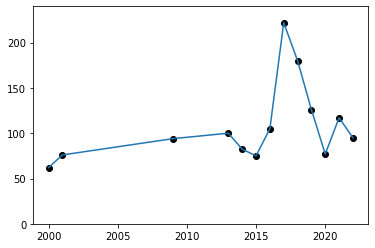

In [10]:
plt.plot(toty['Year'],toty['Fee(€ mln)'])
plt.scatter(toty['Year'],toty['Fee(€ mln)'],color='black')
plt.ylim(0,240)
plt.show()

I made a graph of the columns "Year" and "Fee(€ mln)". We can clearly see that there is a huge bulge on 2017 and 2018. The two dots represent the transfers of Neymar in 2017 and Kylian Mbappe in 2018. They came to Parc des princes with transfer fee of 222 million euros and 180 million each, which till now is astronomical. Almost every football fan said that the club that bought them, Paris Saint-Germain, was insane. But if we neglect the two dots, it can be found out that cultivating a linear regression model may work on that graph. So I kicked Neymar and Mbappe out to build the first model.

In [53]:
kk=toty.drop(8).drop(7)
kk.index = range(0,len(kk))
kk

,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born
0,56,Portugal,Luís Figo,Spain,Barcelona,Spain,Real Madrid,Midfielder,62.0,£37,2000,1972
1,28,France,Zinedine Zidane,Italy,Juventus,Spain,Real Madrid,Midfielder,76.0,£46.6,2001,1972
2,13,Portugal,Cristiano Ronaldo,England,Manchester United,Spain,Real Madrid,Forward,94.0,£80,2009,1985
3,9,Wakes,Gareth Bale,England,Tottenham Hotspur,Spain,Real Madrid,Forward,100.0,£86,2013,1989
4,19,Uruguay,Luis Suárez,England,Liverpool,Spain,Barcelona,Striker,82.3,£65,2014,1987
5,30,Belgium,Kevin De Bruyne,Germany,VfL Wolfsburg,England,Manchester City,Midfielder,75.0,£55,2015,1991
6,7,France,Paul Pogba,Italy,Juventus,England,Manchester United,Midfielder,105.0,£89,2016,1993
7,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,£104.1,2019,1999
8,27,Germany,Kai Havertz,Germany,Bayer Leverkusen,England,Chelsea,Midfielder,77.0,£70,2020,1999
9,6,England,Jack Grealish,England,Aston Villa,England,Manchester City,Midfielder,117.0,£100,2021,1995


In [55]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
yr=kk['Year']
y=kk['Fee(€ mln)']
x=pd.Series(yr).array
x=x.reshape(11,1)
x

<PandasArray>
[
[2000],
[2001],
[2009],
[2013],
[2014],
[2015],
[2016],
[2019],
[2020],
[2021],
[2022]
]
Shape: (11, 1), dtype: int64

In [56]:
model.fit(x,y)

LinearRegression()

In [57]:
y_pred=model.predict([[2024]])
print(y_pred)

[108.10569236]


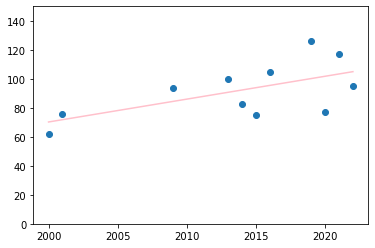

In [60]:
yl=model.predict(x)
plt.scatter(x,y)
plt.plot(x,yl,color='pink')
plt.ylim(0,150)
plt.show()

The model is based only on one feature, the year of the transfer, and the predicted transfer fee of 2024 top one transfer seems too low to me. Also it doesn't take clubs like Paris Saint-Germain (PSG for short) into consideration. Since more consortiums from Middle East begin to enter the football world and own clubs such as Manchester City and Newcastle, astronomical transfer fees somehow become affordable. I don't believe that if the top one transfer of 2024 sends a player to PSG, the transfer fee will just be slightly over 100 million. Therefore, I made several graphs of the features and transfer fee, then I selected some features that seem to be representative.

<AxesSubplot:title={'center':'From country'}>

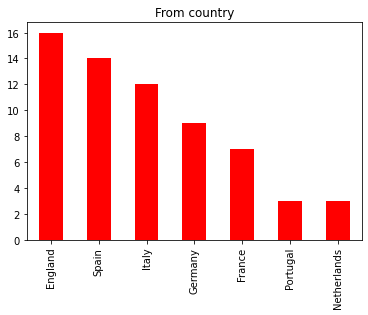

In [15]:
ft1='From(Country)'
result=df[ft1].value_counts()
result.plot(kind="bar",color='r',title='From country')

<AxesSubplot:title={'center':'To country'}>

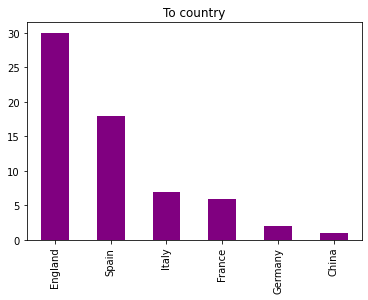

In [16]:
ft2='To(Country)'
result=df[ft2].value_counts()
result.plot(kind="bar",color='purple',title='To country')

<AxesSubplot:title={'center':'Origin'}>

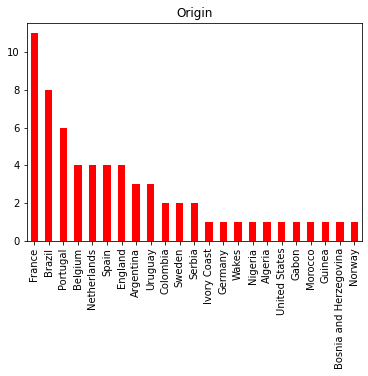

In [17]:
ft3='Origin'
result=df[ft3].value_counts()
result.plot(kind="bar",color='r',title='Origin')

<AxesSubplot:title={'center':'Position'}>

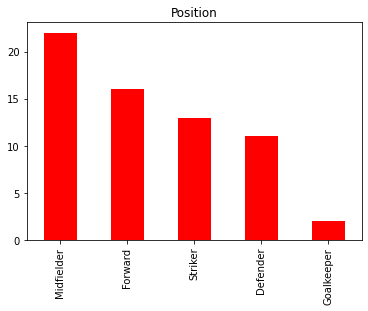

In [18]:
ft4='Position'
result=df[ft4].value_counts()
result.plot(kind="bar",color='r',title='Position')

Three features stood out in this round. In order that the data can be trained, I gave labels to those features. Below are the labelling rules:

To country: 0--England, 1--Spain, 2--others

Origin: 0--France, 1--Brazil&Portugal, 2--others

Position: 0--Goalkeeper, 1--Defender, 2--Midfielder, 3--Forward, 4--Striker

In [19]:
newdf=df.drop('Rank',axis=1).drop('Player',axis=1).drop('From(Country)',axis=1).drop('From(Club)',axis=1).drop('To(Club)',axis=1).drop('Fee(£ mln)',axis=1)
newdf

,Origin,To(Country),Position,Fee(€ mln),Year,Born
0,Brazil,France,Forward,222.0,2017,1992
1,France,France,Forward,180.0,2018,1998
2,Brazil,Spain,Midfielder,145.0,2018,1992
3,Portugal,Spain,Forward,126.0,2019,1999
4,France,Spain,Forward,120.0,2019,1991
...,...,...,...,...,...,...
59,Guinea,England,Midfielder,60.0,2018,1995
60,Colombia,France,Striker,60.0,2013,1986
61,Bosnia and Herzegovina,Spain,Midfielder,60.0,2020,1990
62,Norway,England,Striker,60.0,2022,2000


In [20]:
def ornum(origin):
    if origin=='France':
        return 0
    elif origin=='Brazil' or origin=='Portugal':
        return 1
    else: 
        return 2
    
def tonum(to):
    if to=='England':
        return 0
    elif to=='Spain':
        return 1
    else: 
        return 2
    
def posnum(position):
    if position=='Goalkeeper':
        return 0
    if position=='Defender':
        return 1
    if position=='Midfielder':
        return 2
    if position=='Forward':
        return 3
    if position=='Striker':
        return 4

newdf['origin']=newdf['Origin'].apply(lambda x: ornum(x))
newdf['to']=newdf['To(Country)'].apply(lambda x: tonum(x))
newdf['position']=newdf['Position'].apply(lambda x: posnum(x))
newdf=newdf.drop('Origin',axis=1).drop('To(Country)',axis=1).drop('Position',axis=1)
newdf


,Fee(€ mln),Year,Born,origin,to,position
0,222.0,2017,1992,1,2,3
1,180.0,2018,1998,0,2,3
2,145.0,2018,1992,1,1,2
3,126.0,2019,1999,1,1,3
4,120.0,2019,1991,0,1,3
...,...,...,...,...,...,...
59,60.0,2018,1995,2,0,2
60,60.0,2013,1986,2,2,4
61,60.0,2020,1990,2,1,2
62,60.0,2022,2000,2,0,4


In [21]:
newx=newdf.drop('Fee(€ mln)',axis=1)
newy=newdf['Fee(€ mln)']
newy=pd.Series(newy).array
newy=newy.reshape(64,1)
newx=np.array(newx)
newx


array([[2017, 1992,    1,    2,    3],
       [2018, 1998,    0,    2,    3],
       [2018, 1992,    1,    1,    2],
       [2019, 1999,    1,    1,    3],
       [2019, 1991,    0,    1,    3],
       [2021, 1995,    2,    0,    2],
       [2016, 1993,    0,    0,    2],
       [2017, 1997,    0,    1,    3],
       [2013, 1989,    2,    1,    3],
       [2018, 1985,    1,    2,    3],
       [2019, 1991,    2,    1,    3],
       [2022, 2000,    1,    0,    3],
       [2009, 1985,    1,    1,    3],
       [2016, 1987,    2,    2,    4],
       [2019, 1993,    2,    0,    1],
       [2017, 1993,    2,    0,    4],
       [2021, 2000,    2,    0,    2],
       [2018, 1991,    2,    0,    1],
       [2014, 1987,    2,    1,    4],
       [2022, 2000,    2,    2,    4],
       [2022, 2000,    0,    0,    1],
       [2019, 1996,    0,    2,    1],
       [2019, 1993,    2,    2,    4],
       [2019, 1995,    2,    0,    3],
       [2018, 1994,    2,    0,    0],
       [2022, 2000,    0,

In [22]:
linear_m = sklearn.linear_model.LinearRegression()
linear_m.fit(newx,newy)


LinearRegression()

In [23]:
linear_m.intercept_

array([-1401.78291288])

In [24]:
linear_m.coef_

array([[  0.35650867,   0.38401102, -12.56174128,   6.37427144,
          4.99815726]])

In [51]:
player=[[2024,2000,0,1,3]]
newy_pred=linear_m.predict(player)
print(newy_pred)

[[109.18142833]]


In [43]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test=train_test_split(newx,newy,test_size=0.2)
xmodel = sklearn.linear_model.LinearRegression()

In [44]:
xmodel.fit(x2_train,y2_train)

LinearRegression()

In [45]:
xmodel.intercept_

array([915.14570343])

In [46]:
xmodel.coef_

array([[ -1.41160599,   1.01106196, -13.12397656,   7.52549434,
          4.9886315 ]])

In [47]:
yp=xmodel.predict(x2_test)

In [48]:
print("Mean squared error: %.2f" % 
      sklearn.metrics.mean_squared_error(y2_test, yp))

print("Coefficient of determination R^2: %.2f" % 
      sklearn.metrics.r2_score(y2_test, yp))

Mean squared error: 479.67
Coefficient of determination R^2: -0.37


In [52]:
nyp=xmodel.predict(player)
print(nyp)

[[102.6704752]]
